In [1]:
load("wild_mosaics.py")

In [2]:
M = matrix([[0,2,1,0,0],[2,9,10,1,0],[3,10,9,10,1],[0,3,7,8,4],[0,0,3,4,0]]); W = Mosaic(M);

In [3]:
W.matrix() 

[ 0  2  1  0  0]
[ 2  9 10  1  0]
[ 3 10  9 10  1]
[ 0  3  7  8  4]
[ 0  0  3  4  0]

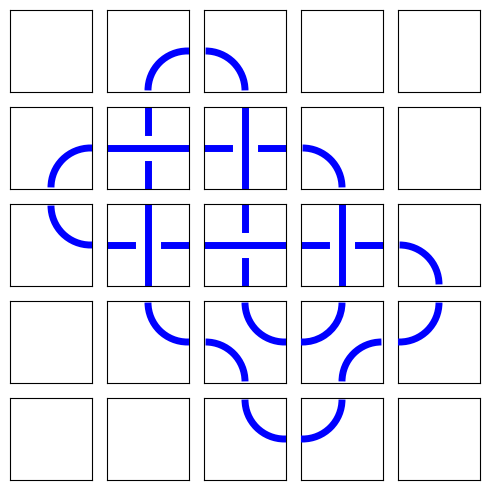

In [4]:
W.show()

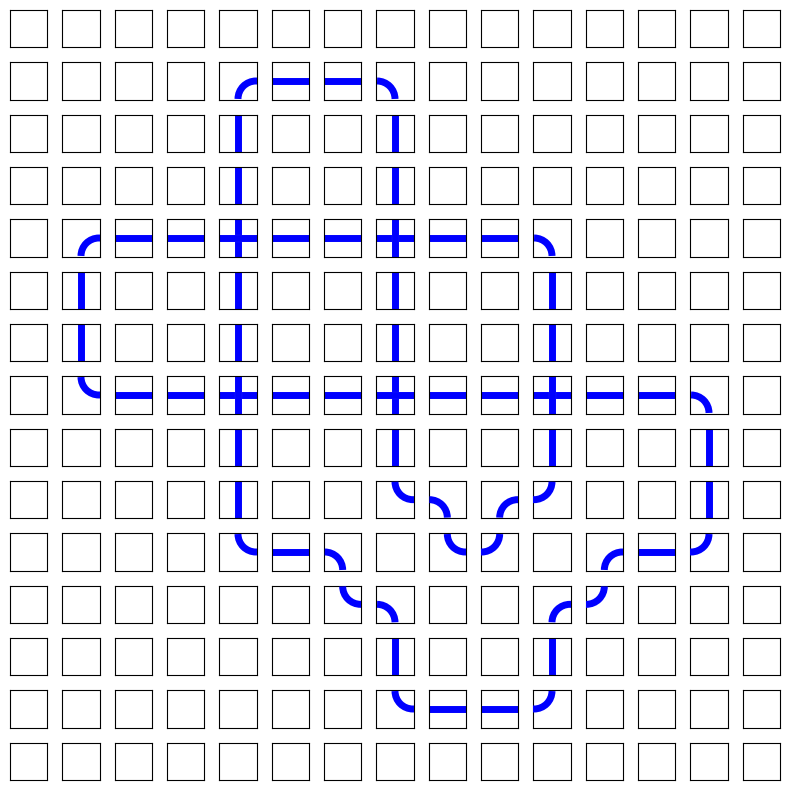

[(4, 7), (4, 8), (4, 9), (4, 10), (5, 10), (6, 10), (7, 10)]

In [5]:
W = Mosaic(M).zoom(); W.show(8)
W.walk((4,7), 'right', pathList = True) # Putting 'True' provides the pathing

In [9]:
W.strandOf((4,4), direction = 'right')

[(4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 10),
 (6, 10),
 (7, 10),
 (8, 10),
 (9, 10),
 (9, 9),
 (10, 9),
 (10, 8),
 (9, 8),
 (9, 7),
 (8, 7),
 (7, 7),
 (6, 7),
 (5, 7),
 (4, 7),
 (3, 7),
 (2, 7),
 (1, 7),
 (1, 6),
 (1, 5),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 4),
 (9, 4),
 (10, 4),
 (10, 5),
 (10, 6),
 (11, 6),
 (11, 7),
 (12, 7),
 (13, 7),
 (13, 8),
 (13, 9),
 (13, 10),
 (12, 10),
 (11, 10),
 (11, 11),
 (10, 11),
 (10, 12),
 (10, 13),
 (9, 13),
 (8, 13),
 (7, 13),
 (7, 12),
 (7, 11),
 (7, 10),
 (7, 9),
 (7, 8),
 (7, 7),
 (7, 6),
 (7, 5),
 (7, 4),
 (7, 3),
 (7, 2),
 (7, 1),
 (6, 1),
 (5, 1),
 (4, 1),
 (4, 2),
 (4, 3)]

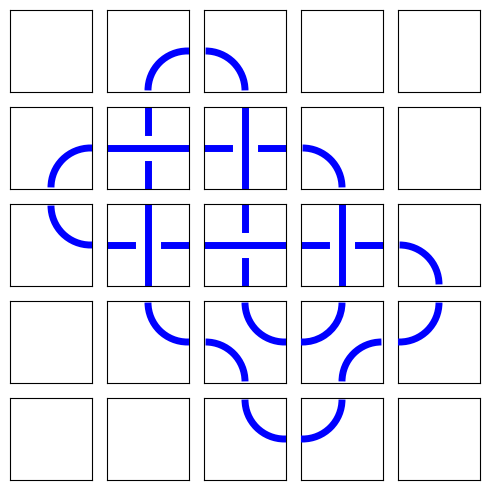

In [10]:
W = Mosaic(M);
W.show()

In [7]:
W.isSuitablyConnected()

True

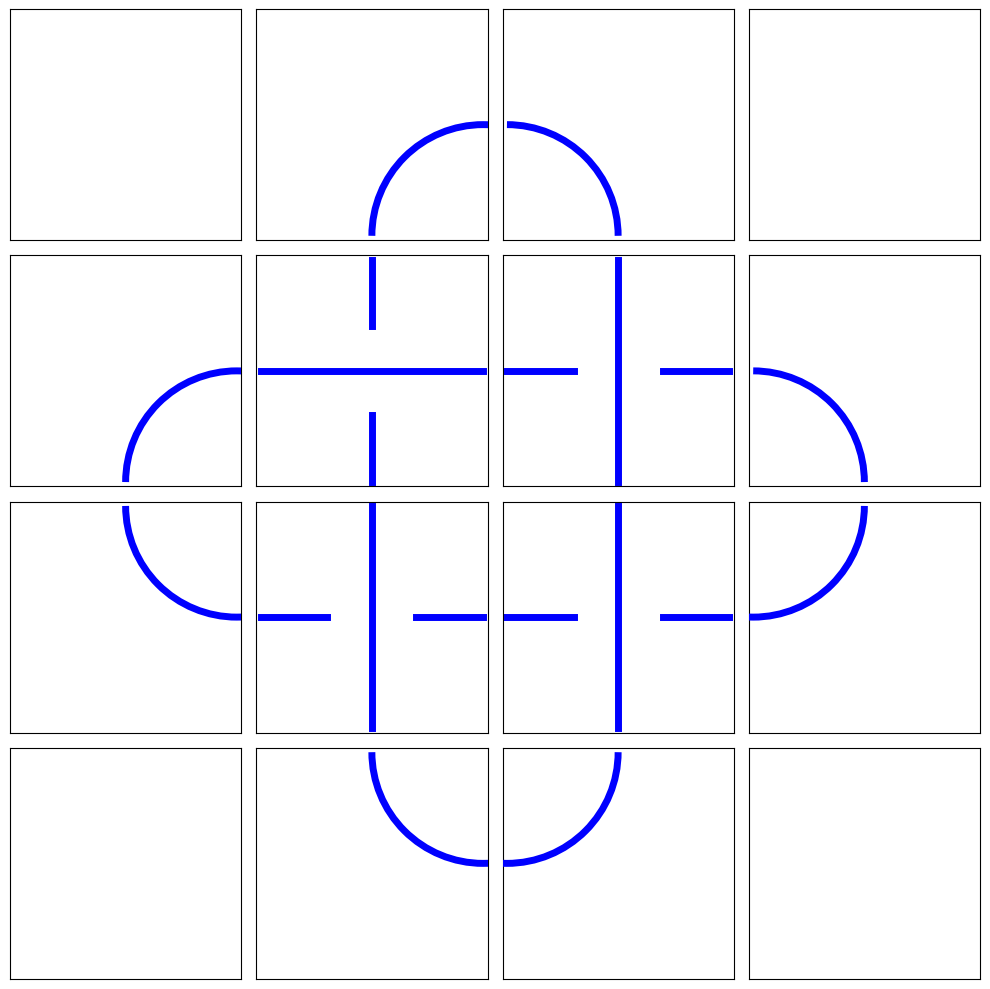

In [9]:
hopf = Mosaic([[0,2,1,0],[2,9,10,1],[3,10,10,4],[0,3,4,0]]); hopf.show(10)

In [28]:
W = Mosaic(M);
W.directions(1,1)

['up', 'down', 'left', 'right']

In [25]:
W.shift(0,1)

[(1, 1), (0, 2)]

In [32]:
set(Tile(2).connectionDirections)

{'down', 'right'}

In [34]:
M = Mosaic(matrix(ZZ,20,20)); M.size

20